In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\covid_19_india.csv")

In [3]:
data.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
data.tail(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,09/12/20,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995


In [5]:
data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
Sno                         9291 non-null int64
Date                        9291 non-null object
Time                        9291 non-null object
State/UnionTerritory        9291 non-null object
ConfirmedIndianNational     9291 non-null object
ConfirmedForeignNational    9291 non-null object
Cured                       9291 non-null int64
Deaths                      9291 non-null int64
Confirmed                   9291 non-null int64
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [8]:
data = data.drop(['Sno', 'ConfirmedIndianNational','ConfirmedForeignNational'], axis=1)

In [9]:
data.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3


In [10]:
data = data.rename(columns = {'State/UnionTerritory': 'States', 'Cured': 'Recovered'})

In [11]:
data.head()

,Date,Time,States,Recovered,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3


In [12]:
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

In [13]:
data.sort_values(['Date', 'Time']).reset_index(drop= True)

,Date,Time,States,Recovered,Deaths,Confirmed,Active
0,01/02/20,6:00 PM,Kerala,0,0,2,2
1,01/03/20,6:00 PM,Kerala,0,0,3,3
2,01/04/20,7:30 PM,Andhra Pradesh,1,0,83,82
3,01/04/20,7:30 PM,Andaman and Nicobar Islands,0,0,10,10
4,01/04/20,7:30 PM,Assam,0,0,1,1
...,...,...,...,...,...,...,...
9286,31/10/20,8:00 AM,Telengana,218887,1336,238632,18409
9287,31/10/20,8:00 AM,Tripura,28878,346,30717,1493
9288,31/10/20,8:00 AM,Uttarakhand,57270,1011,61915,3634
9289,31/10/20,8:00 AM,Uttar Pradesh,448644,7007,480082,24431


In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data.head()

,Date,Time,States,Recovered,Deaths,Confirmed,Active
0,2020-01-30,6:00 PM,Kerala,0,0,1,1
1,2020-01-31,6:00 PM,Kerala,0,0,1,1
2,2020-01-02,6:00 PM,Kerala,0,0,2,2
3,2020-02-02,6:00 PM,Kerala,0,0,3,3
4,2020-03-02,6:00 PM,Kerala,0,0,3,3


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 7 columns):
Date         9291 non-null datetime64[ns]
Time         9291 non-null object
States       9291 non-null object
Recovered    9291 non-null int64
Deaths       9291 non-null int64
Confirmed    9291 non-null int64
Active       9291 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 508.2+ KB


In [17]:
true_cases = data[data['Date'] == data['Date'].max()].copy().fillna(0)
true_cases.index = true_cases['States']


In [18]:
true_cases.head()

,Date,Time,States,Recovered,Deaths,Confirmed,Active
States,,,,,,,
Andaman and Nicobar Islands,2020-12-11,8:00 AM,Andaman and Nicobar Islands,4267,60,4494,167
Andhra Pradesh,2020-12-11,8:00 AM,Andhra Pradesh,820234,6828,847977,20915
Arunachal Pradesh,2020-12-11,8:00 AM,Arunachal Pradesh,14126,46,15657,1485
Assam,2020-12-11,8:00 AM,Assam,203308,954,209633,5371
Bihar,2020-12-11,8:00 AM,Bihar,216940,1162,223917,5815


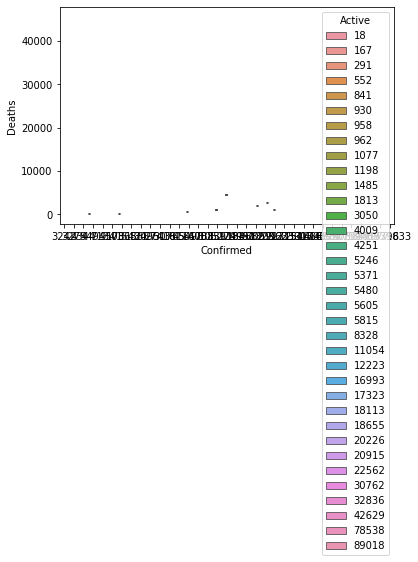

In [19]:
sns.boxplot(x = true_cases["Confirmed"], hue = true_cases["Active"], y = true_cases["Deaths"])

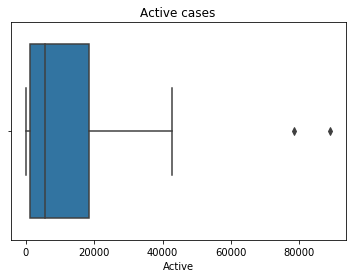

In [20]:
sns.boxplot(true_cases["Active"]).set_title("Active cases")
plt.show()

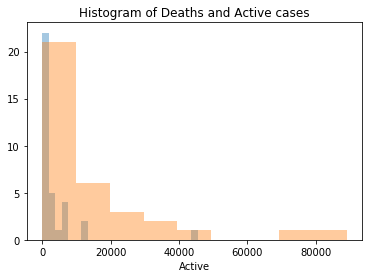

In [21]:
sns.distplot(true_cases["Deaths"], kde = False).set_title("Showing two in one")
sns.distplot(true_cases["Active"], kde=False).set_title("Histogram of Deaths and Active cases")
plt.show()

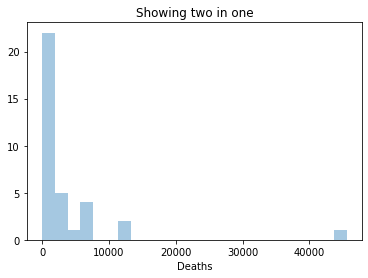

In [22]:
sns.distplot(true_cases["Deaths"], kde = False).set_title("Showing two in one")
plt.show()